Uses Matplotlib, pandas, and openpxyl
Serves to learn more about our first Data

**0. Installing Dependencies**

In [2]:
#Dependencies
%pip install openpyxl matplotlib pandas seaborn -q


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


**1. Retrieving Data**

In [3]:
import pandas as pd
file_path = '../../Data/EnergieUebersichtCH-2024.xlsx' 
xls = pd.ExcelFile(file_path)
#Data in this case in the 3rd sheet Zeitreihen0h15
df = pd.read_excel(xls, sheet_name='Zeitreihen0h15', header=1, nrows=300)
print(df.columns)


Index(['Zeitstempel', 'kWh', 'kWh.1', 'kWh.2', 'kWh.3', 'kWh.4', 'kWh.5',
       'kWh.6', 'kWh.7', 'kWh.8', 'kWh.9', 'kWh.10', 'kWh.11', 'kWh.12',
       'kWh.13', 'kWh.14', 'kWh.15', 'kWh.16', 'kWh.17', 'kWh.18', 'kWh.19',
       'Euro/MWh', 'Euro/MWh.1', 'Euro/MWh.2', 'Euro/MWh.3', 'kWh.20',
       'kWh.21', 'kWh.22', 'kWh.23', 'kWh.24', 'kWh.25', 'kWh.26', 'kWh.27',
       'kWh.28', 'kWh.29', 'kWh.30', 'kWh.31', 'kWh.32', 'kWh.33', 'kWh.34',
       'kWh.35', 'kWh.36', 'kWh.37', 'kWh.38', 'kWh.39', 'kWh.40', 'kWh.41',
       'kWh.42', 'kWh.43', 'kWh.44', 'kWh.45', 'kWh.46', 'kWh.47', 'kWh.48',
       'kWh.49', 'kWh.50', 'kWh.51', 'kWh.52', 'kWh.53', 'kWh.54', 'kWh.55',
       'kWh.56', 'kWh.57', 'kWh.58', 'kWh.59'],
      dtype='object')


**2. Data variables / potential parameters** 

**Pre-processing step** Renaming column names to be clear

In [4]:
column_mapping = {
    'kWh': 'Total Energy Consumed by End Users (kWh)',
    'kWh.1': 'Total Energy Production (kWh)',
    'kWh.2': 'Total Energy Consumption (kWh)',
    'kWh.3': 'Net Outflow (kWh)',
    'kWh.4': 'Grid Feed-In (kWh)',
    'kWh.5': 'Positive Secondary Control Energy (kWh)',
    'kWh.6': 'Negative Secondary Control Energy (kWh)',
    'kWh.7': 'Positive Tertiary Control Energy (kWh)',
    'kWh.8': 'Negative Tertiary Control Energy (kWh)'
}

df.rename(columns=column_mapping, inplace=True)


**3. Data variables Explanation**

**A. Total Energy Consumed by End Users in the Swiss Control Block** The total of the end-user energy consumption in the Swiss control area.

**B. Total Energy Production in the Swiss Control Block**
The total amount of energy generated within the Swiss control area, including power from hydroelectric, nuclear, solar, and other sources.

**C. Total Energy Consumption in the Swiss Control Block**
The total energy used within the Swiss control area, including end-user consumption and grid losses.

**D. Net Outflow of the Swiss Transmission Grid**
The balance of electricity flowing out of the Swiss transmission grid, calculated as exports minus imports.

**E. Grid Feed-In Swiss Transmission Grid**
The total amount of energy fed into the Swiss transmission grid from various power generation sources.

**F. Positive Secondary Control Energy**
The amount of additional energy supplied to stabilize the grid when demand exceeds supply, helping to maintain frequency stability.

**G. Negative Secondary Control Energy**
The amount of energy reduced or removed from the grid when supply exceeds demand, balancing the system.



**H. Positive Tertiary Control Energy**
Additional energy reserves activated to stabilize the grid in case secondary control is insufficient, typically used for longer durations.


**I. Negative Tertiary Control Energy**
The reduction of energy fed into the grid to restore balance when supply exceeds demand over a longer period.

Mathematical relationships:

C=A+Grid Losses

Total Energy Consumption in the Swiss Control Block = Total Energy Consumption by end-users + Grid Losses

Grid Losses could be a useful variable!

Net outflow = Exports − Imports

Correlation Matrix for the first 4 Energy Variables:

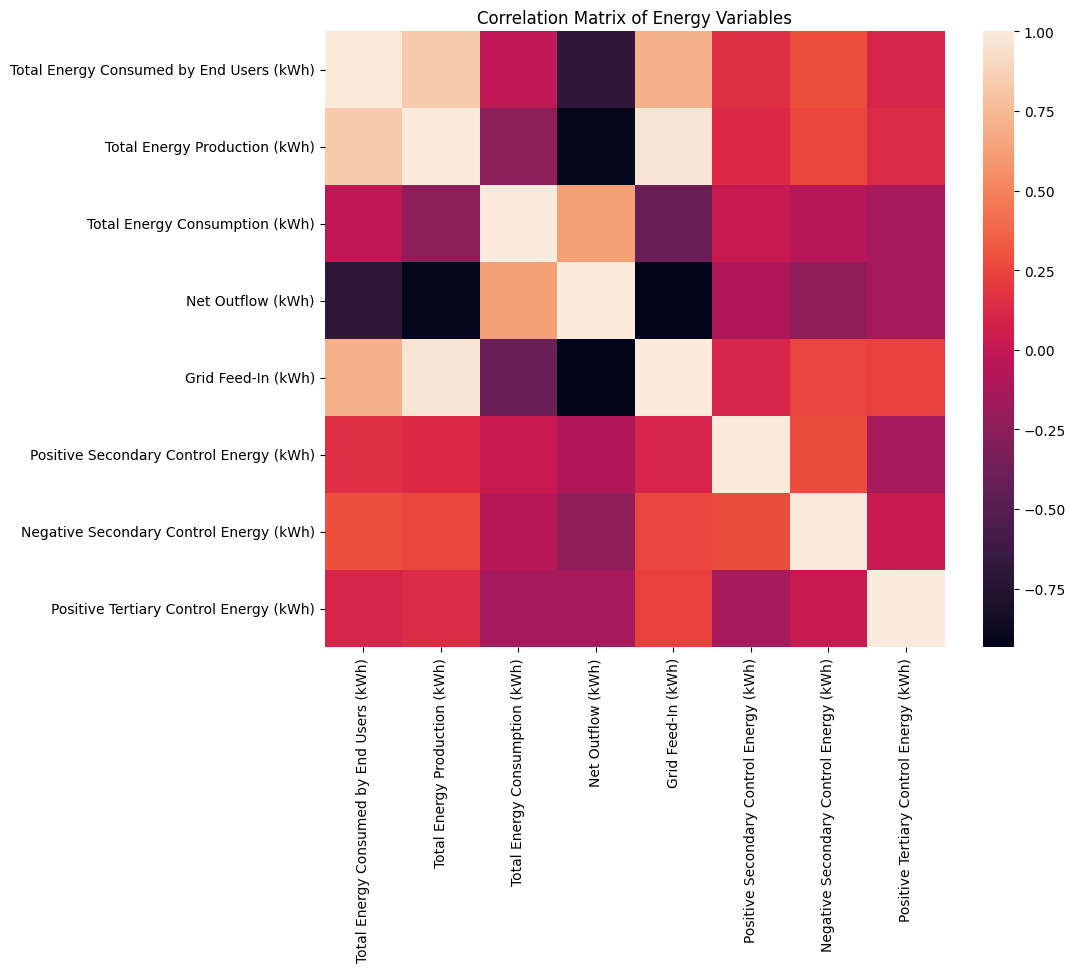

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

#subsetting without time columbn
df_subset = df.iloc[:, 1:9]
correlation_matrix = df_subset.corr()
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix)
plt.title("Correlation Matrix of Energy Variables")
plt.show()


Autocorellation, Cross-correllation, definir les y à prédire, definir l'horizon, definir les x, 

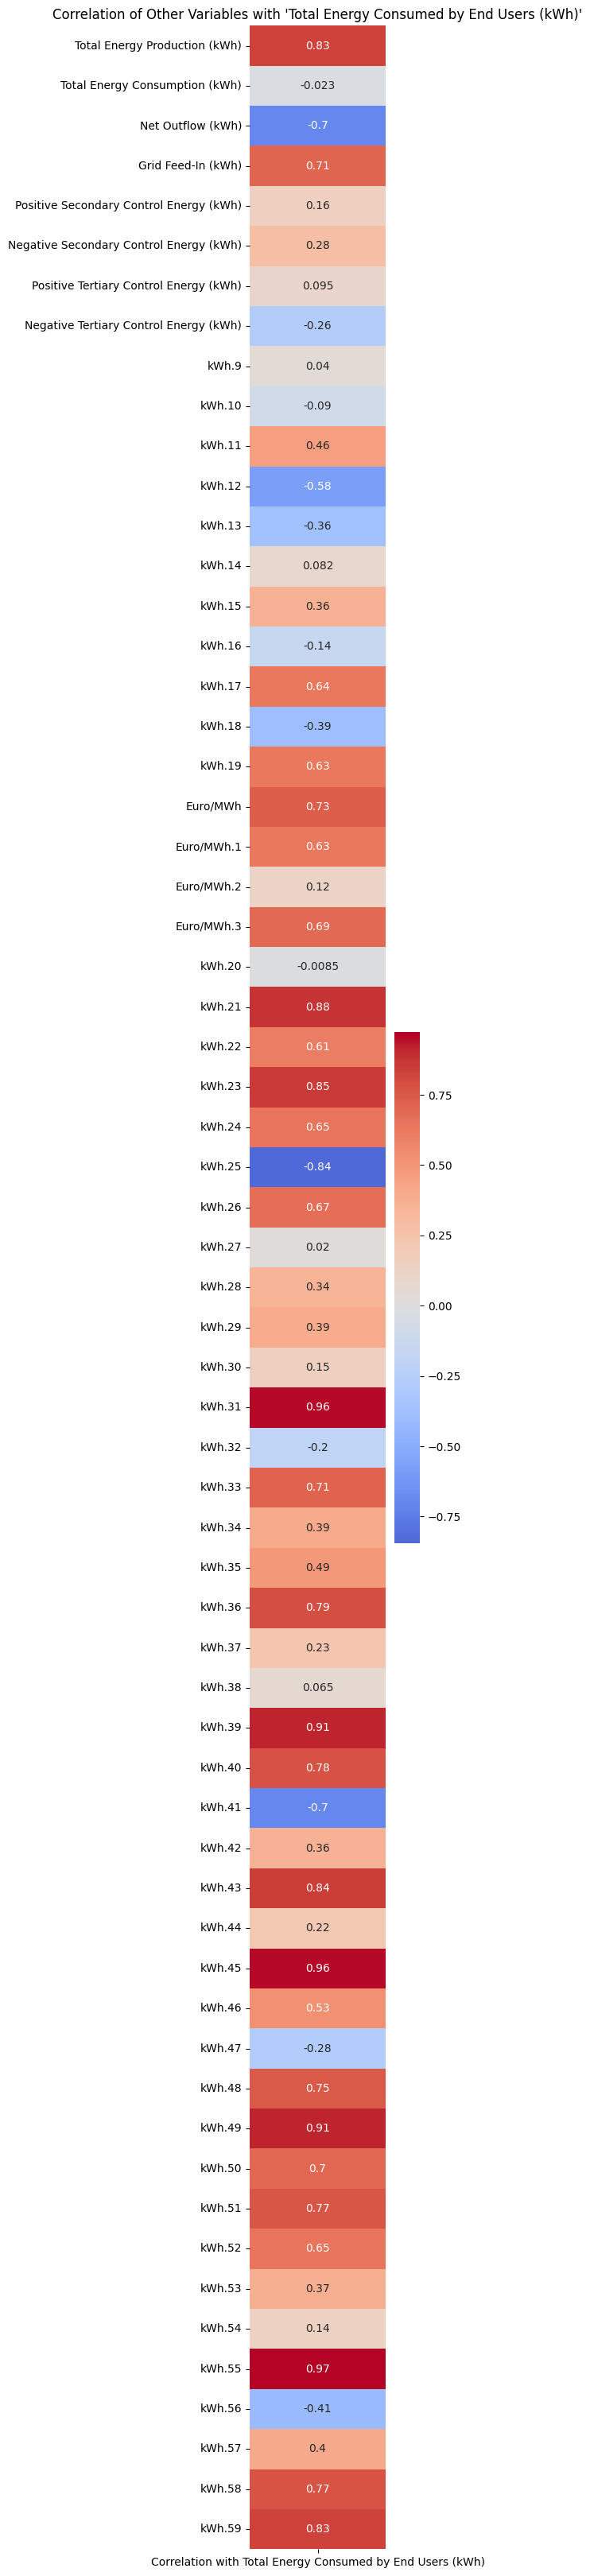

In [11]:
reference_col = df.columns[1]

df_subset = df.iloc[:, 1:]

# 3. Compute correlation with reference column
correlation_vector = df_subset.corr()[reference_col].drop(reference_col)

correlation_df = correlation_vector.to_frame(name=f"Correlation with {reference_col}")

# 5. Plot heatmap
plt.figure(figsize=(6, len(correlation_df) * 0.5 + 1))
sns.heatmap(correlation_df, annot=True, cmap="coolwarm", center=0, cbar=True)
plt.title(f"Correlation of Other Variables with '{reference_col}'")
plt.tight_layout()
plt.show()

